<a href="https://colab.research.google.com/github/NikitaDash/Airbnb_EDA_Analysis/blob/main/Airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name : Airbnb analysis**

Project type - EDA

Contribution - Individual

# Project Summery-



The Airbnb NYC Analysis project is an exploratory data analysis (EDA) project conducted using Python. The project focuses on analyzing the Airbnb listings data in New York City to gain insights into the rental market.

The EDA begins with data preprocessing, which involves cleaning and transforming the dataset to make it suitable for analysis. This step includes handling missing values, removing irrelevant columns, and converting data types as necessary.

Once the data is prepared, the project delves into descriptive analysis, aiming to understand the distribution and characteristics of the Airbnb listings in NYC. This analysis includes examining factors such as listing prices, neighborhood popularity, property types, and availability throughout the year.

The project then moves on to uncovering patterns and relationships within the dataset. It explores correlations between variables, investigates the impact of different features on listing prices, and identifies any seasonality or trends in rental demand.

Visualizations, such as histograms, scatter plots, and heatmaps, are utilized to effectively present the findings and aid in understanding the data. These visual representations help highlight key insights and trends in the Airbnb market in NYC.

Overall, the Airbnb NYC Analysis project utilizes Python and EDA techniques to provide a comprehensive overview of the rental market in New York City, enabling stakeholders to make data-driven decisions and gain valuable insights for various purposes, such as investment strategies, pricing optimizations, and understanding the dynamics of the Airbnb ecosystem in the city




# Problem Statement :

The problem statement in the Airbnb NYC Analysis project revolves around gaining insights and understanding the rental market in New York City through an analysis of the Airbnb listings data. The specific objectives of the project include:

1. **Understanding the distribution and characteristics of Airbnb listings in NYC**:This involves exploring factors such as property types, neighborhood popularity, and the availability of listings throughout the year. The aim is to gain a comprehensive understanding of the types of accommodations available and their geographical distribution within the city.

2. **Analyzing pricing patterns and factors influencing listing prices**: This entails examining the factors that impact the pricing of Airbnb listings in NYC. By analyzing variables such as property type, location, amenities, and other features, the project seeks to identify the key drivers of listing prices and uncover any trends or patterns in pricing.

3. **Competitive Analysis**: The objective is to analyze the competition in the Airbnb market in NYC. By studying other listings in the area, hosts can benchmark their offerings, identify unique selling points, and differentiate themselves to attract more guests.

4. **Guest Preferences:** What are the preferences and expectations of Airbnb guests in NYC? What features are most desired by guests? Are there any specific trends or patterns in guest reviews or ratings that can help hosts improve their offerings and attract more guests?

5. **Rental Demand and Availability**: What is the demand for Airbnb rentals in different neighborhoods of NYC? Which neighborhoods have the highest and lowest availability of listings? Are there specific periods or seasons when the demand and availability fluctuate?

By addressing these objectives, the project aims to provide stakeholders with valuable insights and data-driven recommendations. These insights can be used for various purposes, including optimizing pricing strategies, understanding market dynamics, and making informed decisions related to Airbnb rentals in New York City.

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [ ]:
#mounting data
from google.colab  import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#loading dataset and printing dataset
airbnb_df = pd.read_csv('/content/drive/MyDrive/Csv file/Airbnb NYC 2019.csv')
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#shape of dataset
airbnb_df.shape


(48895, 16)

## **Plotting the dataset in a map**

To visualize a dataset on a map, we can utilize the Folium library. By leveraging the latitude and longitude information provided in the dataset, we can create an interactive map with zooming functionality. Setting the initial zoom level to 9 allows for clear visibility of location clusters. By employing the Folium library, we can easily plot the dataset on the map, enabling users to explore individual locations in detail.

In [ ]:
Long=-73.80
Lat=40.80
locations = list(zip(airbnb_df.latitude, airbnb_df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [ ]:
#basic informatin about dataset

airbnb_df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [ ]:
#finding datatype of each column
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
#columns of dataset

list(airbnb_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Checking for total null values in each column

airbnb_df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Percentage of null values in each column

print(100*(airbnb_df.isnull().sum()/len(airbnb_df.index)).sort_values(ascending=False))


last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


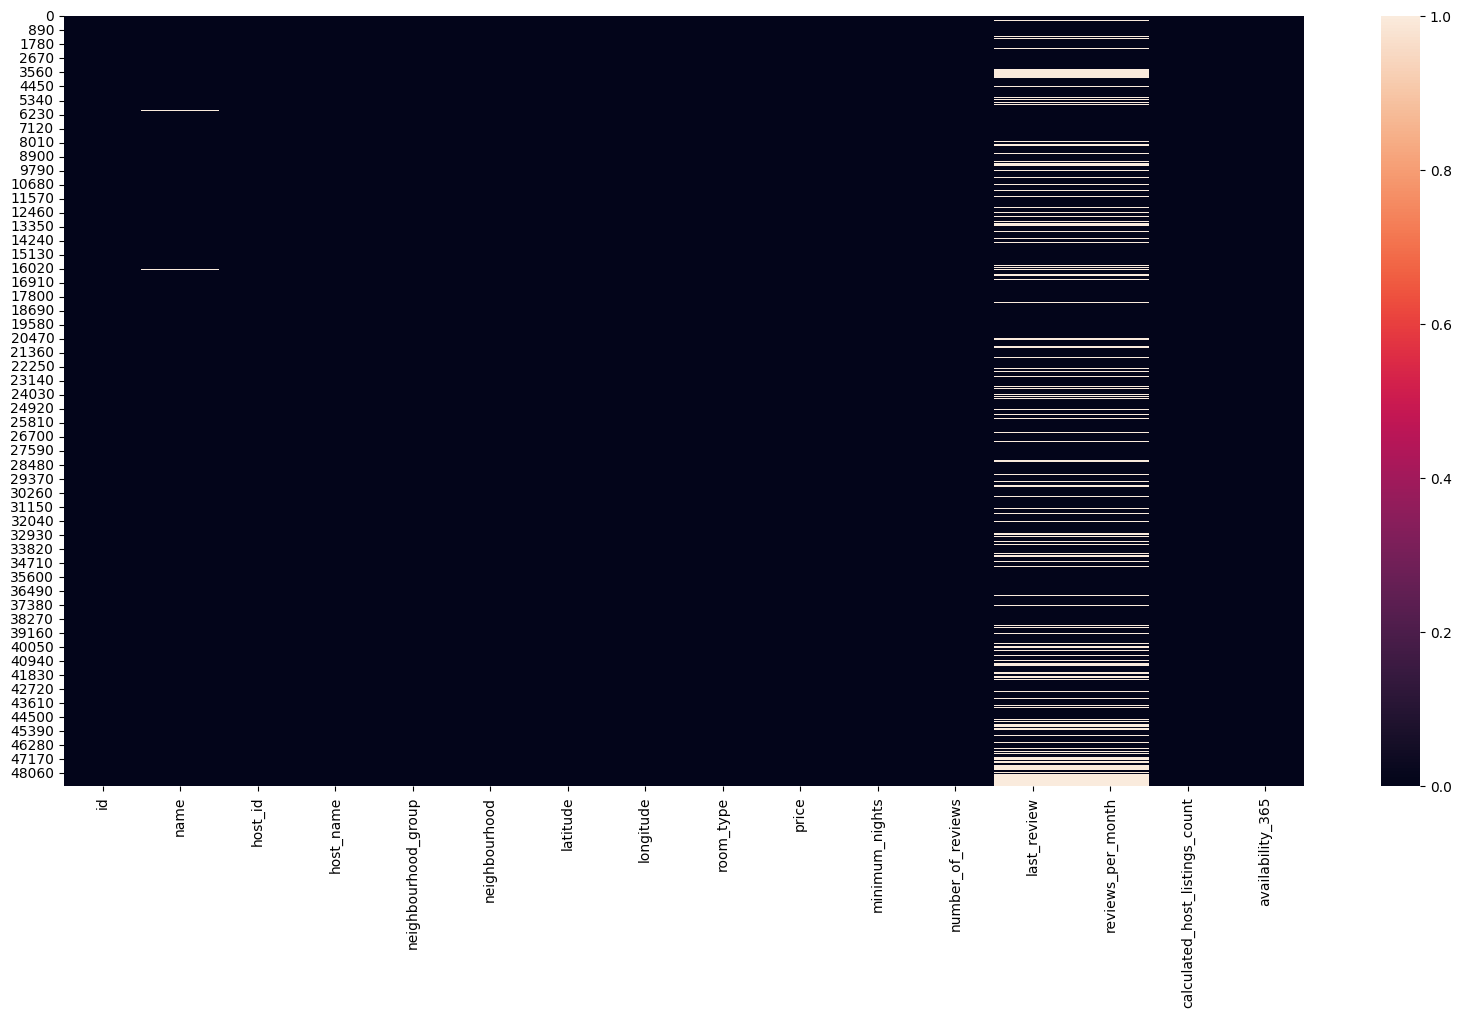

In [ ]:
# Plotting heatmap of null values

fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(airbnb_df.isna())
plt.show()

### ****Conclusion of heatmap****

### 1. There are four columns which contains null values are last_review, reviews_per_month, host_name,name.                          
### 2. Approx 20% of last_reviews and reviews_per_month column is filled with null values.

In [ ]:
#creat a copy of dataset before handling null values
df = airbnb_df.copy()

## we will replace all null values with 0, because these are not missing values instead they will be considered as "Not Applicable".

In [ ]:
#handling null values
df[['host_name','name' ]] = df[['host_name','name']].fillna(0.0)
df[['last_review','reviews_per_month']] = df[['last_review','reviews_per_month']].fillna(0.0)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,0.00,6,2


### exploring some columns

In [ ]:
df['name'].unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [ ]:
df['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
0.0                                                   16
New york Multi-unit building                          16
Brooklyn Apartment                                    12
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47906, dtype: int64

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
#descriptive statistics of dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<ipython-input-16-5d745d92541b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="coolwarm",annot=True)


<Axes: >

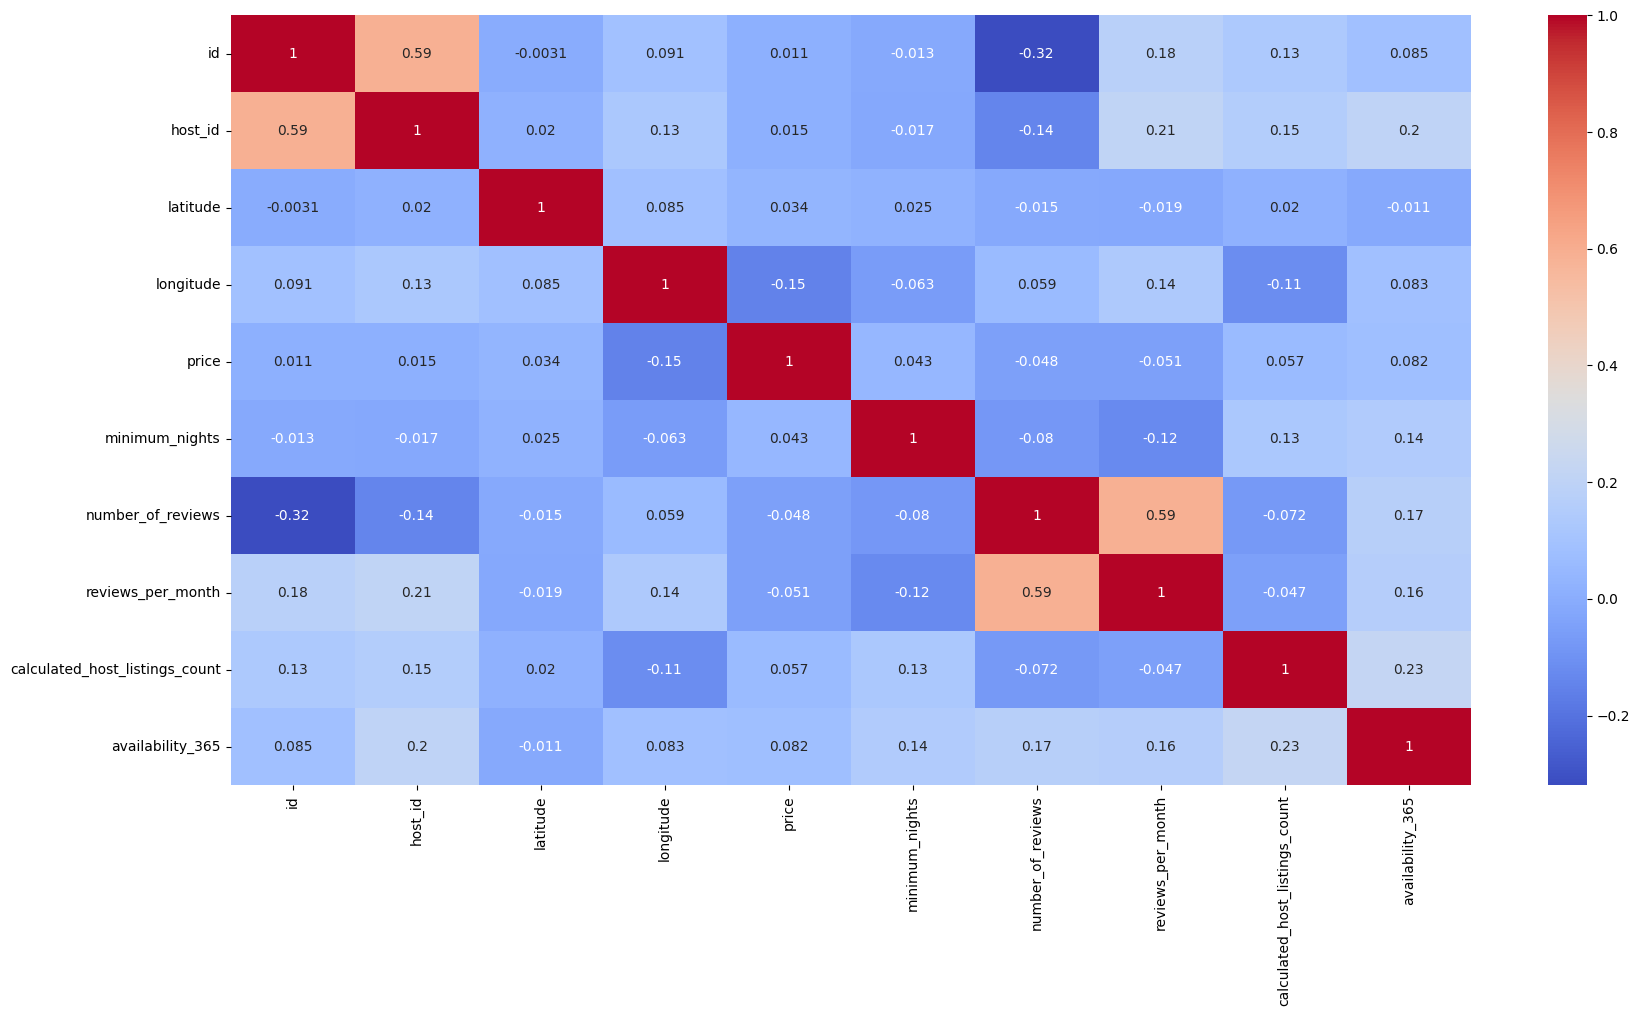

In [ ]:
#correlation heat map

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

### From the above correlation heatmap it's clear  that host_id and id, reviews_per_month and number_of_reviews are highly positively correlated with eachother compared to others.

### id is highly negatively correlate with number_of_reviews compared to others.

# **Scatter Plot to show the neighbourhood group based on Latitude and Longitude**

We will plot the same latitude and longitude in a scatter plot to have the cluster of the location, the same we did with the folium maps.

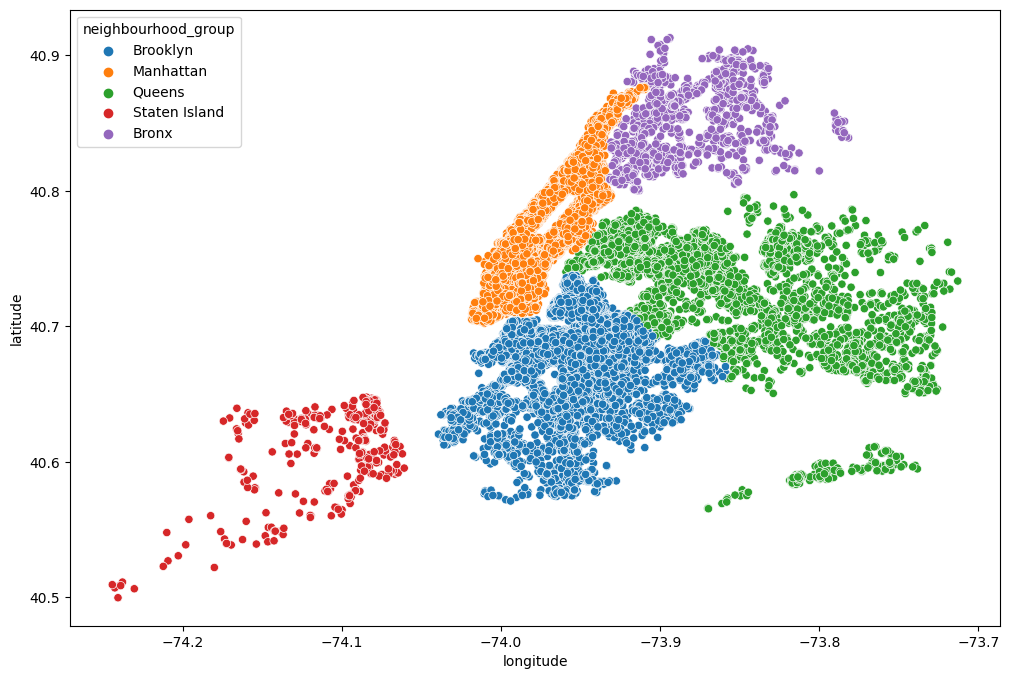

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

From the above plot it's clear that there were less airbnb distribution in Staten Island neighbourhood comparing to other neighbourhoods

# **Top 10 Apartment listings**

Below i am displaying the Entire Home/Apartment renting and it looks odd that Sonder(NYC) have itself is too high. We will also list out only the details for the user if they are genuine hotels or there is any discrepancy in the data. We will use the latitude and longitude of the data to find out

In [ ]:
apt = df[df['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,apartment
20211,219517861,Sonder (NYC),Financial District,Manhattan,210
6449,7503643,Vida,Greenpoint,Brooklyn,52
8430,12243051,Sonder,Financial District,Manhattan,51
20214,219517861,Sonder (NYC),Murray Hill,Manhattan,50
19900,205031545,Red Awning,Midtown,Manhattan,49
17832,120762452,Stanley,Murray Hill,Manhattan,49
12273,30283594,Kara,Hell's Kitchen,Manhattan,41
17451,107434423,Blueground,Chelsea,Manhattan,37
12275,30283594,Kara,Midtown,Manhattan,33
17628,113805886,Yaacov,Upper East Side,Manhattan,33


# **Lets see the Sonder (NYC)**

In [ ]:
sonder_data = df[df['host_name']=='Sonder (NYC)']
sonder_data_by = sonder_data[['host_id','host_name','neighbourhood','latitude','longitude']]
sonder_data_by.head(5)

,host_id,host_name,neighbourhood,latitude,longitude
38293,219517861,Sonder (NYC),Financial District,40.70637,-74.00645
38294,219517861,Sonder (NYC),Financial District,40.70771,-74.00641
38588,219517861,Sonder (NYC),Financial District,40.70743,-74.00443
39769,219517861,Sonder (NYC),Murray Hill,40.74792,-73.97614
39770,219517861,Sonder (NYC),Murray Hill,40.74771,-73.97528


# **Top 10 Private room**

We will do it for both Private room and Shared room and also will check for the top hoteliers if it is the same location or it is spread out.

In [ ]:
private = df[df['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,private
15261,190921808,John,Hell's Kitchen,44
14025,137358866,Kazuya,Woodside,35
16301,238321374,Eyal,Upper West Side,32
15984,224414117,Gabriel,Hell's Kitchen,30
16035,226410657,Nina,Bedford-Stuyvesant,26
16144,230192510,Zach,Fort Greene,25
16386,242962235,Yuval,Ridgewood,23
16539,252604696,Erin,Chelsea,20
15761,216235179,Nina,Bushwick,17
14024,137358866,Kazuya,Sunnyside,17


Seeing the above latitude and longitude it is clear that it is in the same building




# **Exploration of Neighbourhood Group**

Let's explore the neighbourhood group now to see the data distribution.



In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

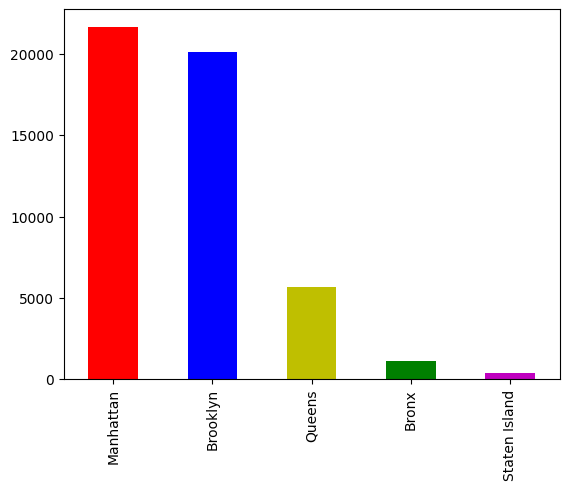

In [ ]:
#chart to show listing of neighbourhood groups
df['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()

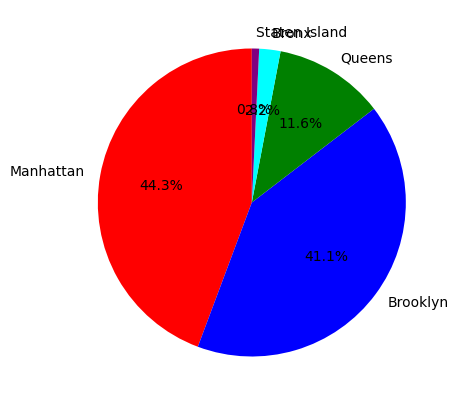

In [ ]:
#to show the percentage of listing in neighbourhood group
plt.figure(figsize=(10,5))
labels = df['neighbourhood_group'].value_counts().index.tolist()
sizes = df['neighbourhood_group'].value_counts().tolist()
colors = ['red', 'blue','green','cyan','purple']

plt.pie(sizes,labels=labels, colors=colors ,autopct='%1.1f%%',startangle =90, textprops={'fontsize': 10})
plt.show()


we can conclude from the chart that When comparing the number of listings in Manhattan and Brooklyn to those in Queens, Bronx, and Staten Island, it is evident that Manhattan and Brooklyn have a higher concentration of listings.
Nearly 44% of listing in Mahattan and 2% in Staten Island.

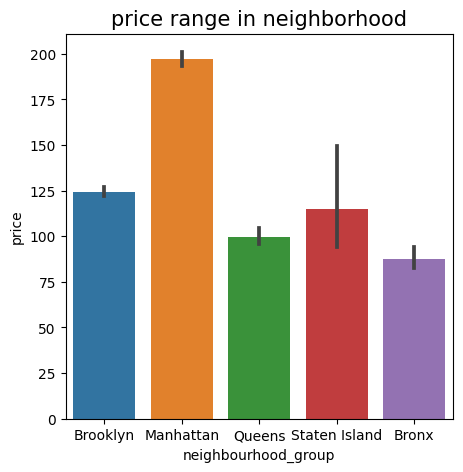

In [ ]:
#price range in neighborhood groups
plt.figure(figsize=(5,5))
sns.barplot(x = 'neighbourhood_group', y= 'price', data=df )
plt.title('price range in neighborhood', fontsize = 15)
plt.xlabel('neighbourhood_group')
plt.ylabel('price')

plt.show()

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

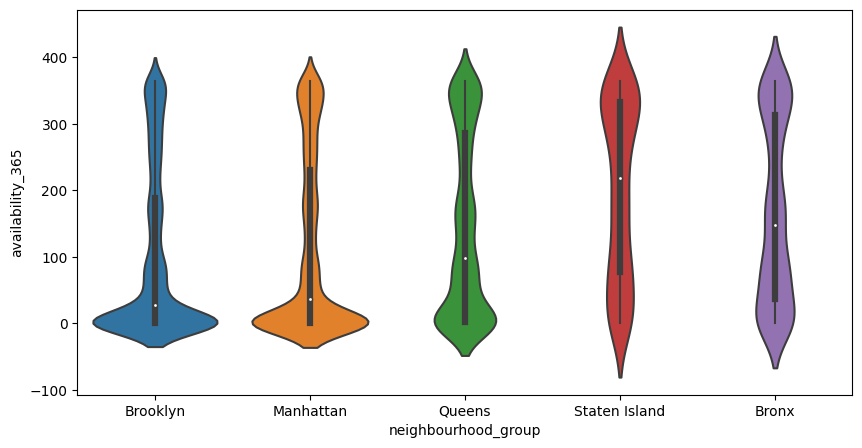

In [ ]:
#to check the availability in neighbourhood
plt.figure(figsize = (10,5))
sns.violinplot(x= df['neighbourhood_group'], y = df['availability_365'], )

The availability is high in staten Island followed by Bronx and low in Brooklyn and Manhattan.


# **Exploring room types:**

Let's explore types of room present and it's distribution and price range in neighbourhood groups.


In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

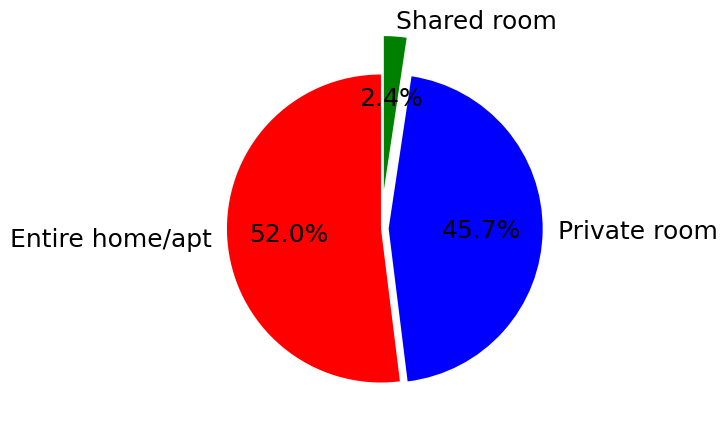

In [ ]:
#plot to show type of room listing
plt.figure(figsize=(10,5))
labels = df['room_type'].value_counts().index.tolist()
sizes = df['room_type'].value_counts().tolist()
colors = ['red', 'blue','green']
explode = (0,0.05,0.25)

plt.pie(sizes, explode = explode ,labels=labels, colors=colors ,autopct='%1.1f%%',startangle =90, textprops={'fontsize': 18})
plt.show()

From the above line chart it's clear that shared room listing is very low and entire home/apt listing is high.

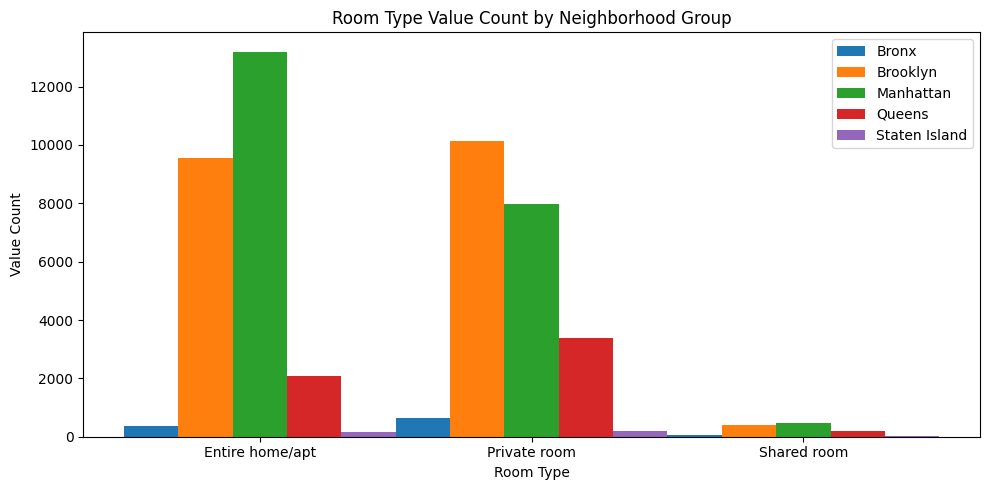

In [ ]:
# to show the listing of different room types in neighbour hood
grouped = df.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='value_count')
neighborhood_groups = grouped['neighbourhood_group'].unique()
room_types = grouped['room_type'].unique()
bar_width = 0.2
x_positions = np.arange(len(room_types))
fig, ax = plt.subplots(figsize=(10, 5))
for i, group in enumerate(neighborhood_groups):

    data = grouped[grouped['neighbourhood_group'] == group]
    offset = bar_width * (i - len(neighborhood_groups) / 2 + 0.5)
    ax.bar(x_positions + offset, data['value_count'], width=bar_width, label=group)

ax.set_xlabel('Room Type')
ax.set_ylabel('Value Count')
ax.set_title('Room Type Value Count by Neighborhood Group')
ax.set_xticks(x_positions)
ax.set_xticklabels(room_types)
ax.legend()

plt.tight_layout()
plt.show()

From the above plot we can conclude that -

-- The listing of Entire home/apt listing is high in Manhattan and very low in
   Staten Island.

-- The listing of private room is high in Brooklyn and very low in Staten
   Island.

-- Although the listing of shared room is low in every neighbourhood but it is
   negligible in Staten Island.

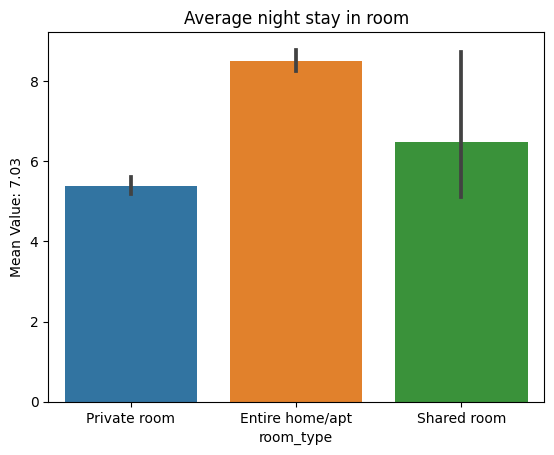

In [ ]:
#to show minimum night spend in types of rooms
mean_value = df['minimum_nights'].mean()
sns.barplot(x='room_type', y='minimum_nights', data=df)
plt.xlabel('room_type')
plt.ylabel('Mean Value: {:.2f}'.format(mean_value))  # Set mean as y-label
plt.title('Average night stay in room')
plt.show()


As Entire home/apt listing is high so minimum nights spend by customer is high in Entire home/apt but despite of shared room listing is low but minimum nights spend is higher than private rooms.

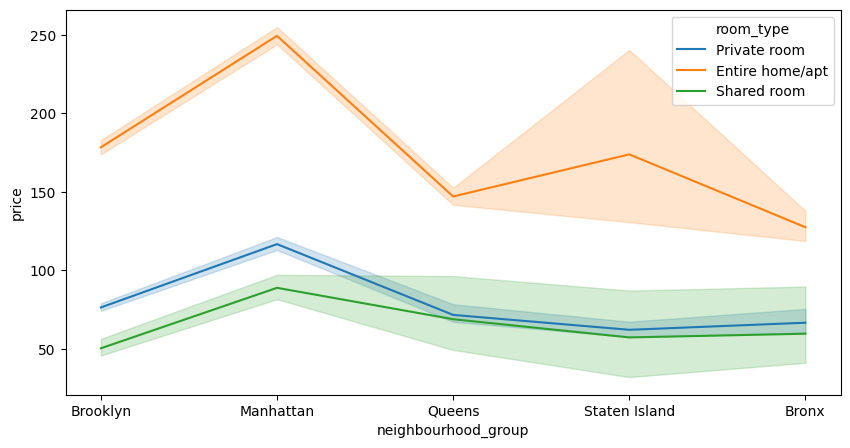

In [ ]:
#price range of rooms in neighborhood
plt.figure(figsize=(10,5))
sns.lineplot(x='neighbourhood_group', y = 'price', hue='room_type', data = df)
plt.show()

Entire home/ apt price is higher in every neighbourhood group followed by private and shared room.

In Mahattan all the rooms are costlier than other neighbourhood group and in Bronx these are cheapest.


<Axes: xlabel='room_type', ylabel='availability_365'>

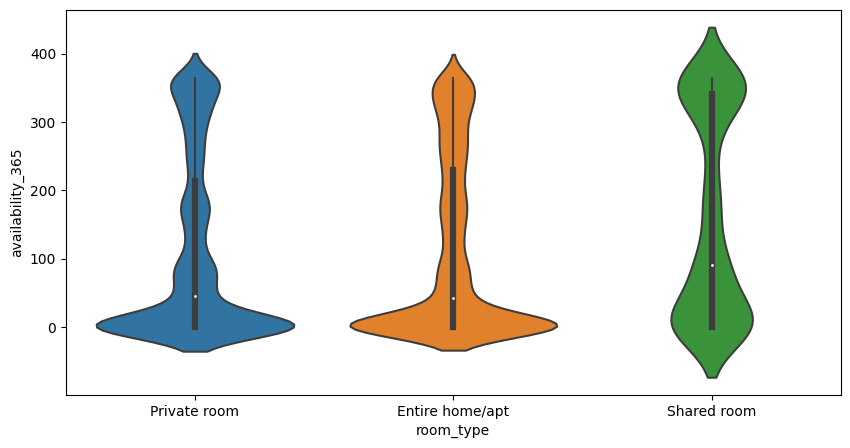

In [ ]:
# to check the availability of different rooms
plt.figure(figsize = (10,5))
sns.violinplot(x= df['room_type'], y = df['availability_365'], )

The availability of Shared room is high in total but the availability of Private room and Entire room/apt is same through out the year.

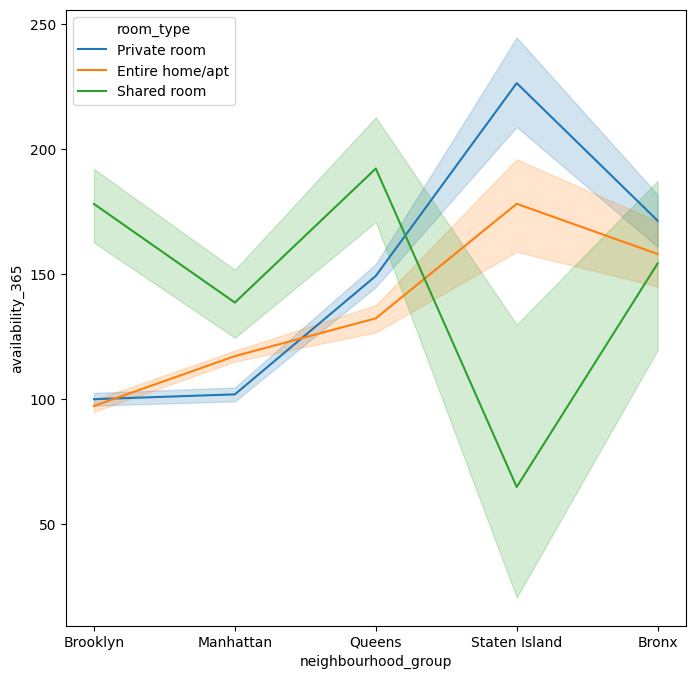

In [ ]:
#to check the availability of rooms in neighbourhood

plt.figure(figsize=(8,8))
sns.lineplot(x='neighbourhood_group', y = 'availability_365', hue='room_type', data = df)
plt.show()

As the listing of shared rooms are low in staten island but availability is also low and in Queens and Brooklyn it is nearly same.

The availabilty of Private room is high in Staten Island and low in Brooklyn.

In Staten Island the availability of Entire home/apt is high and low in Brooklyn.

The demand of Entire home/apt and private room is high in Brooklyn and Manhattan so that availability is quite low compared to others but the demand of shared room is low so availability is high.

# **Price Exploration**

We will check if there is any null value presentin the price column and from the below, it looks like we don't have any null value to take care of.

In [ ]:
df.price.isna().sum()

0

Let's have a quick summary of the price data. In according to the summary statistics it is clear that the Price ranges from  0−180. But there also exists price which has a maximum of $10000. This we cannot discard as an outlier because there are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc. Also, we can see from the below there are few few values with 0, which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.

We also plot a boxplot to understand how the data is spread out for high ranges for the price irrespective of region.

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

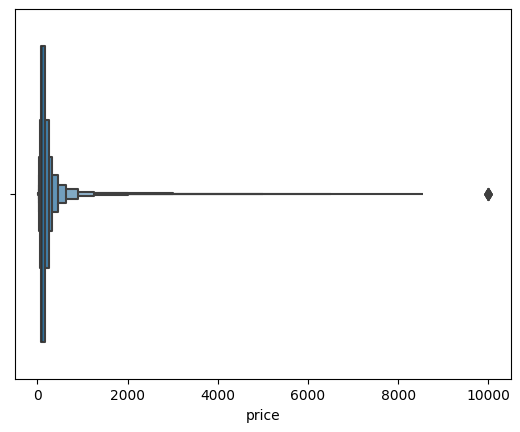

In [ ]:
#box plot to analyse the high ranges distribution
figsize=(10,5)
sns.boxenplot(x='price',data=df)

**Average room rent for locality**

For any traveller, the most important thing is the price since this sets the budget of his/her trip. So in the below we will figure out what is the average price per night. We will check for different room type and based on neighbourhood group to figure out what is the average per night stay.

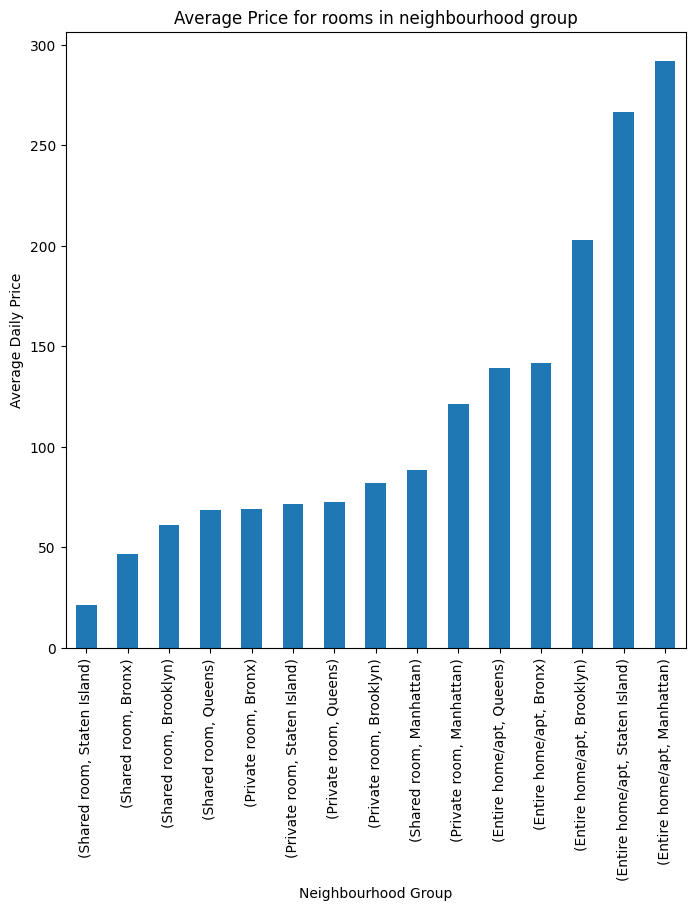

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [ ]:
df.head()
plt.figure(figsize=(8,8))
df = df[df['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

Staying at a Apartment is always an expensive stay than shared room/private rooms for any location. This is so because Entire room is rented out by family for nice stay where privacy is also one of the major factor. Whereas Stay at Shared rooms are being preferred by travellers who generally don't wish to stay for long time at a particular place and moves around places quickly.

So looking at the above plot it is clear :

a. Shared room at staten Island is the most cheapest stay per night whereas Renting a Entire apartment/Home at Manhattan per night is the most expensive.

b. Average price for Private room is also considerably expensive at manhattan so is the shared room at Manhattan is expensive than other private rooms of the neighbourhood. This clearly states that Manhattan is the expensive stay than any other locality.

c. Bronx is the most cheapest stay in terms of neighbourhood group comparison in respect to room type.

d. Though Shared room at Staten Island is the cheapest whereas Apartment renting is not cheapest at Staten Island. This can be due to the location of a perfect gateway from the rush of the city for a quality time with family get together.



We will also list out the average price for each type of room per neighbourhood so that tourists can plan based on the budget.

**Expensive Neighbourhood**

Till so far we have checked on the location group, but we have not came across each neighbourhood. This is very much important in terms of price to understand which locality has the highest price margin in terms of night being spend by traveller. Let's dig further to understand further.

So we will now plot the most expensive neighbourhood, and we will plot only Top 20 neighbourhood and Bottom 20 with respect to average price. This will help a traveller to choose the appropriate neighbourhood based on his budget.

Top 20 most expensive locality in Airbnb listing are :


<ipython-input-5-80fee1da66f7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",


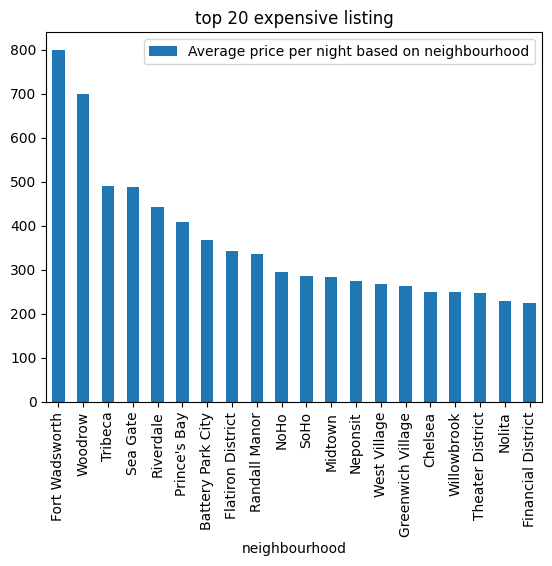

,Average price per night based on neighbourhood
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.557143
Flatiron District,341.925000
Randall Manor,336.000000


In [ ]:
#top 20 neighbourhoods
print('Top 20 most expensive locality in Airbnb listing are :')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(20)

df4.plot(kind='bar')
plt.title('top 20 expensive listing')
plt.show()
pd.DataFrame(df4)

Least expensive neighbourhood according to Airbnb listing are


<ipython-input-7-51f3138172ca>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",


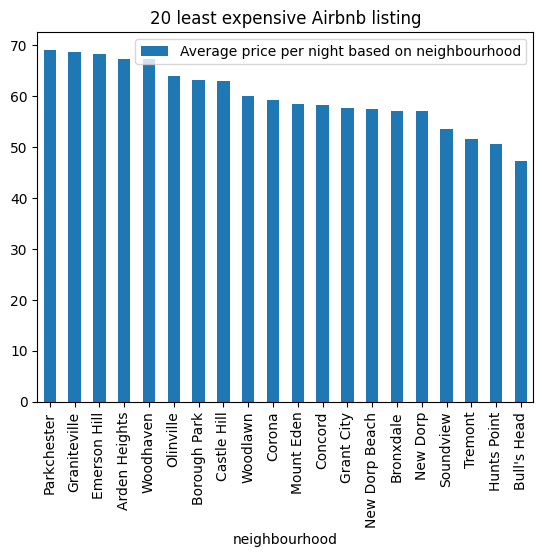

,Average price per night based on neighbourhood
neighbourhood,
Parkchester,69.076923
Graniteville,68.666667
Emerson Hill,68.200000
Arden Heights,67.250000
Woodhaven,67.170455
Olinville,64.000000
Borough Park,63.066176
Castle Hill,63.000000
Woodlawn,60.090909


In [ ]:
#bottom 20 expensive neighbourhoods
print('Least expensive neighbourhood according to Airbnb listing are')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).tail(20)

df4.plot(kind='bar')
plt.title('20 least expensive Airbnb listing')
plt.show()
pd.DataFrame(df4)

So according to the above plot Fort Wadsworth is the most expensive in terms of neighbourhood. Whereas Bull's head locality is the least expensive to stay.

**Most number of locality listed**

We will now try to figure out how many number of neighbourhood has been posted based on the count. We can see Williamsburg has most number of listing count where as Fort Wadesworth has one of the least listing i.e 1.

I have listed below the listing of top 15 as well as least 15 based on the neighbourhood.

If we recall this neighbourhood is one of the highest stay based on price so this can be one of the reason that the price is increased due to the less number of listing.

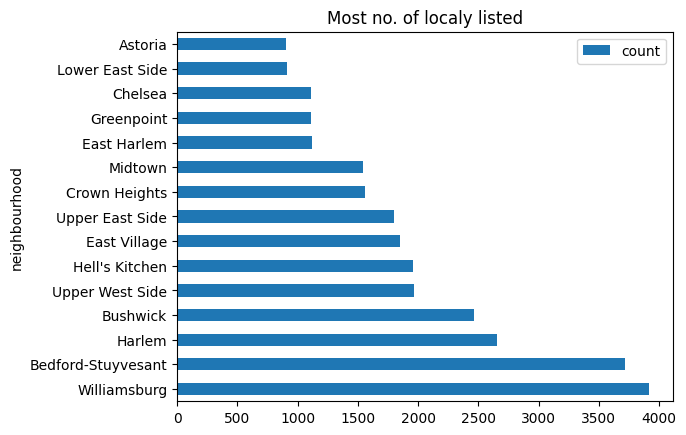

,count
neighbourhood,
Williamsburg,3919
Bedford-Stuyvesant,3714
Harlem,2656
Bushwick,2464
Upper West Side,1970
Hell's Kitchen,1955
East Village,1853
Upper East Side,1797
Crown Heights,1563


In [ ]:
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.title('Most no. of localy listed')
plt.show()
pd.DataFrame(df5.head(15))

Least Listing number of count


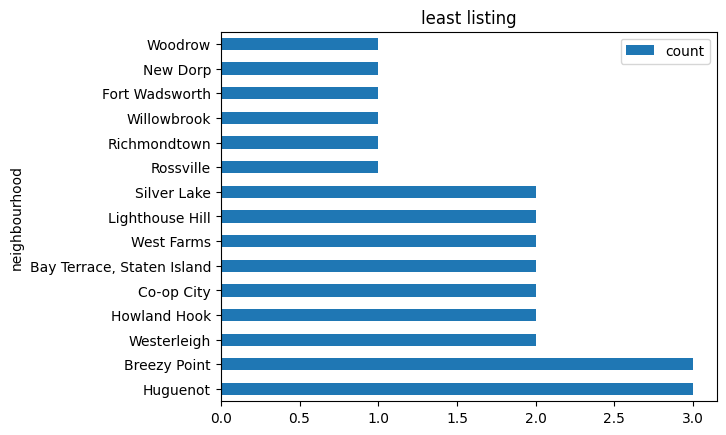

,count
neighbourhood,
Huguenot,3
Breezy Point,3
Westerleigh,2
Howland Hook,2
Co-op City,2
"Bay Terrace, Staten Island",2
West Farms,2
Lighthouse Hill,2
Silver Lake,2


In [ ]:
print('Least Listing number of count')
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.title('least listing')
plt.show()
pd.DataFrame(df5.tail(15))

**Location and Review Score**

Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially. So we will try to figure out the review , how each neighbourhood is doing in respect to review. Since there is a limited data with review we will try to figure out as much as we can.

First criteria of our review is we will consider only those who have a review more than 50, so that we can have an insight of the data.

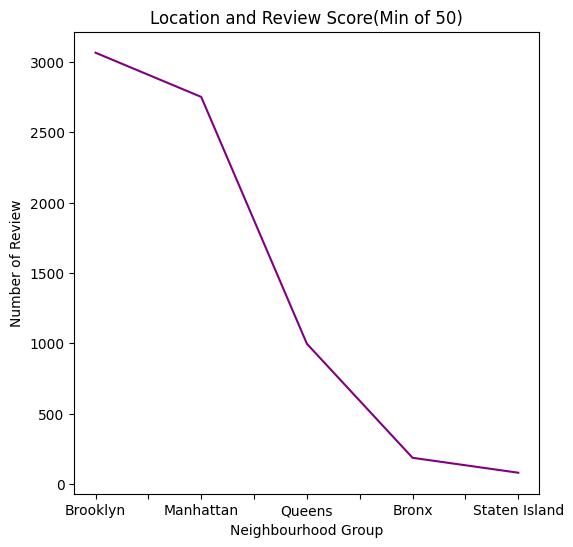

 Count of Review v/s neighbourhood group


,neighbourhood_group
Brooklyn,3065
Manhattan,2751
Queens,997
Bronx,187
Staten Island,81


In [ ]:
fig = plt.figure(figsize=(12,6))
review_50 = df[df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()
df2.plot(kind='line',color=['purple'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

So according to the above plot, Brooklyn got most review in comparison to Manhattan and that is an interesting find. Also Staten Island which is cheaper has less review than the other neighbourhood group. We cannot proceed further to understand why is that case since we have a limited data.

**Top 5 host**

Based on the review score(Minimum 50) we will plot, who is our top 5 Host, this increases the confidence of tourist before booking.

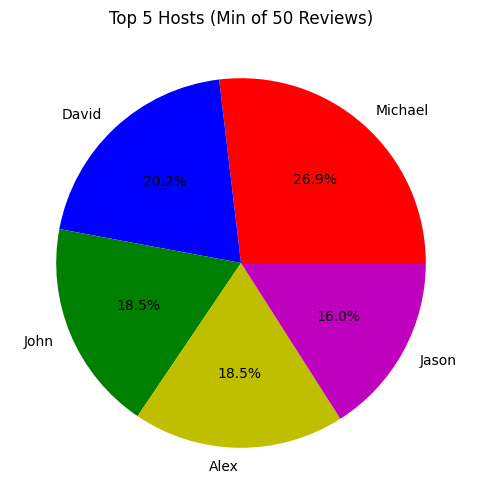

In [ ]:
plt.figure(figsize=(12, 6))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5]

plt.pie(df1, labels=df1.index, autopct='%1.1f%%', colors=['r', 'b', 'g', 'y', 'm'])
plt.title('Top 5 Hosts (Min of 50 Reviews)')
plt.show()


Above pie chart shows the Top 5 host and it looks like Michael has received more reviews for topping the chart .

**lets plot based on the lattitude and location of our review data.**

In [ ]:
map1=folium.Map([40.7128,-74.0080],zoom_start=9.8)
location = ['latitude','longitude']
data = review_50[location]
HeatMap(data.dropna(),radius=8,gradient={.4: 'blue', .65: 'lime', 1: 'red'}).add_to(map1)
map1

**Plot Price based on the Availability 365**

We will plot a scatterplot to understand if there is any price increase based on the availability and looking below the plot its hardly to infer. But looks like with availability with 365 the price increases to 10K.

<Axes: xlabel='availability_365', ylabel='price'>

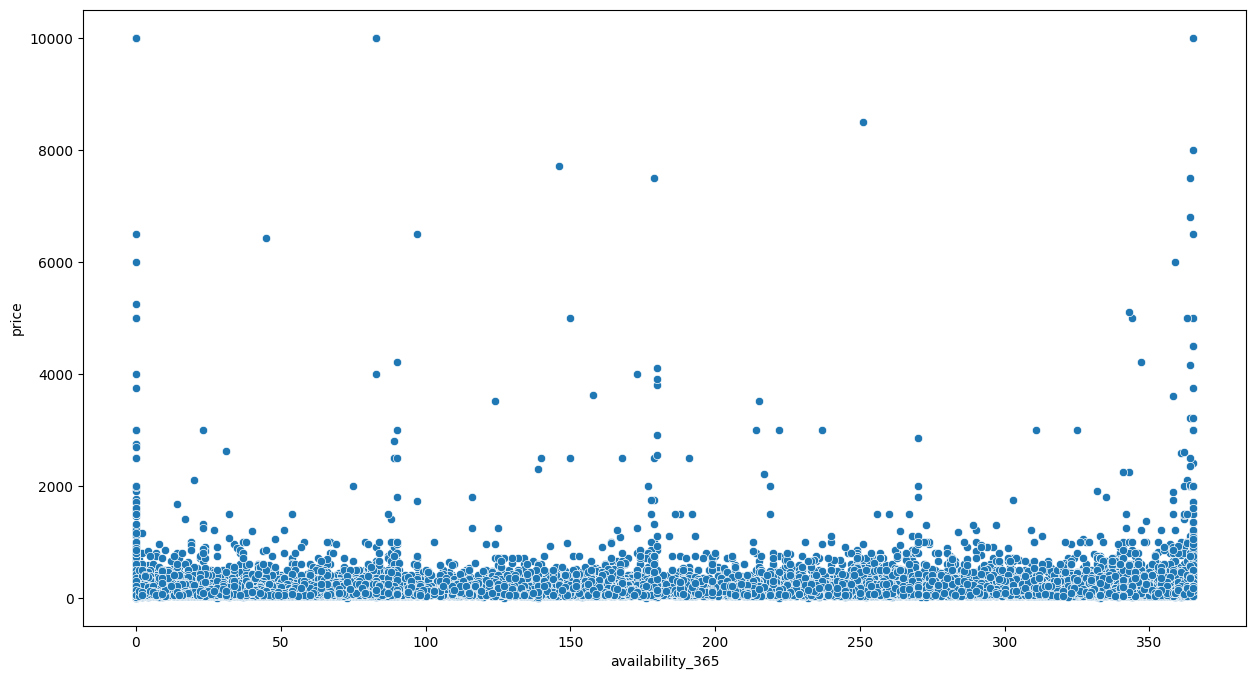

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['availability_365'])

# **Conclusion**

During the project, we performed some interesting analysis of the New York City Airbnb data and managed to answer some questions, such as:

What kind of room is more common in New York City Airbnb?
What is the price difference between different types of rooms?
What are the most expensive regions to stay in New York?
We could also see how to use Python to go from a text file to a complete interactive map.

To accomplish such goals, we went through major data manipulation steps, such as exploring, cleaning, analyzing, and visualizing data.

With all that said, the conclusions are:

Private rooms and entire apartments are the most common room types;
Hotel rooms and entire apartments are usually more expensive than private and shared rooms;
Over 80% of the rooms are located in Manhattan and Brooklyn, which are also the most expensive regions;
Yes, if you want to stay close to the major attractions of the city you'll probably expend more money.